<h1>Analyzing the Impact of Economic Factors on Automobile Sales</h1>

The objective of this project is to analyze historical automobile sales data to understand the relationship between economic conditions (such as recession periods, GDP, unemployment rates) and automobile sales in different vehicle categories. Additionally, the project aims to explore how consumer confidence, pricing, and advertising expenditure impact sales during recession and non-recession periods.


<h2>Importing Libraries</h2>
We start by importing essential libraries:
<ul>
<li><b>Pandas:</b> for data manipulation and analysis.</li>
<li><b>NumPy:</b>  for numerical computations.</li>
<li><b>Matplotlib</b>  and Seaborn:</b>  for creating visualizations.</li>
<li><b>Folium:</b> for mapping and geospatial analysis.</li>
    </ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings("ignore")

<h2>Loading and Initial Exploration of the Dataset</h2>
<p>We load the dataset from a CSV file into a Pandas dataframe using <i><b>pd.read_csv()</b></i>. After loading the data, we:
<br>
    Use <i><b>df.head()</b></i> to display the first five rows of the dataset. This allows us to get a quick glimpse at the data's structure and the variables it contains.</p><br>

In [4]:
df = pd.read_csv('historical_automobile_sales.csv')

In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


<br><b><i>df.describe()</i></b> provides summary statistics for the numeric columns. It calculates metrics such as the mean, standard deviation, minimum, and maximum values, giving us an initial understanding of the data distribution.

In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


<b><i>df.columns</i></b> lists all the column names, helping us verify what features are available in the dataset for analysis. This step ensures we are aware of all the available data points, which include sales figures, recession periods, and economic indicators.<br>

In [7]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

<h2>Analyzing Average Automobile Sales per Year</h2>

<p>
   Here, we focus on understanding the sales trend over time. We group the data by year using <b><i>groupby()</i></b>, then calculate the average automobile sales per year.
This line plot helps visualize the fluctuations in automobile sales across different years. Observing trends over time can highlight periods of growth or decline in sales, potentially linked to economic conditions, technological advancements, or consumer preferences.
    <br><br>
From this plot, we can start identifying key patterns, such as years with major dips or spikes in sales.</p>

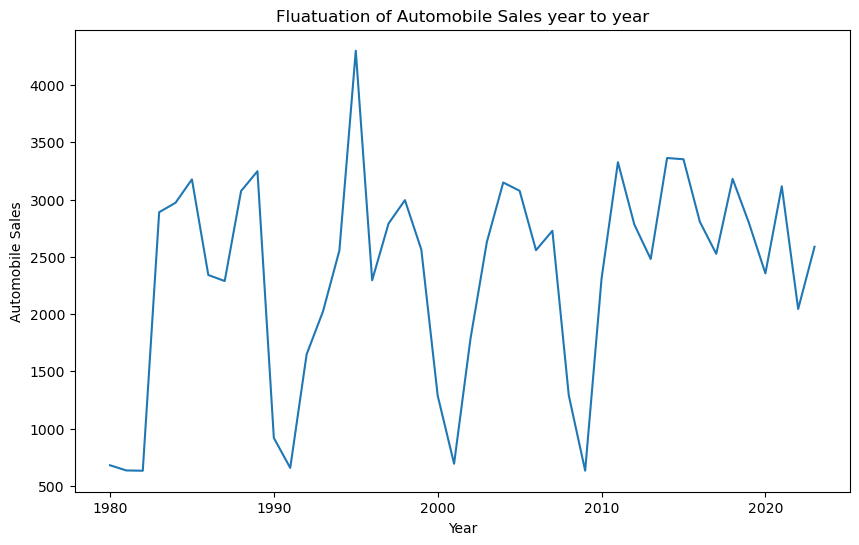

In [8]:
avg_sales_per_year = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
avg_sales_per_year.plot(kind="line")
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Fluatuation of Automobile Sales year to year')
plt.show()

<h2>Highlighting Economic Events in Sales Trends</h2>

<p>
   This enhanced line plot continues our analysis of yearly sales but adds key historical context. Notably:
<ul>
<li>Markers ("o") are added to each data point for clearer visualization.</li>
<li>Two significant recessions: the 1981-82 and 1995-96 recessions are annotated on the plot.</li></ul> <br> 
These economic downturns might have had a strong impact on automobile sales, as indicated by drops in the trend.
   <br><br>
Including these annotations gives us the opportunity to correlate the sales data with real-world economic events, offering more depth to our analysis.</p>

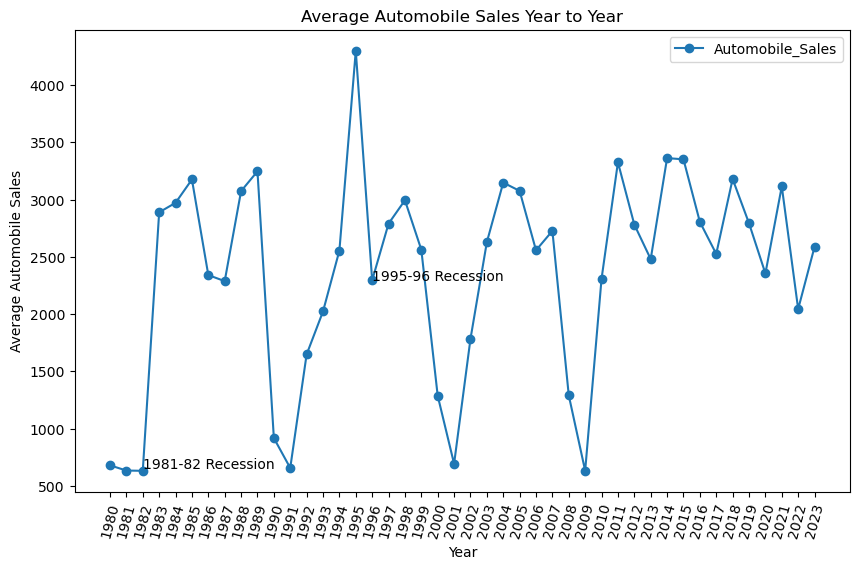

In [9]:
plt.figure(figsize=(10,6))
avg_sales_per_year.plot(kind="line", marker="o")
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Year to Year')
plt.text(1982,650, '1981-82 Recession')
plt.text(1996, 2295, '1995-96 Recession')
plt.legend()
plt.show()

<h2>Vehicle-Type Sales during Recession</h2>
<p>We filter the dataset to include only the years where the economy was in recession (Recession == 1).</p>

Next, we break down the sales trends by vehicle type (e.g., SUVs, sedans) and plot these trends.
<br><br>
This analysis helps us understand whether certain vehicle types were more resilient during economic downturns. For instance, luxury vehicles might see a sharper decline, while essential or economical vehicles could maintain steady sales.<br>



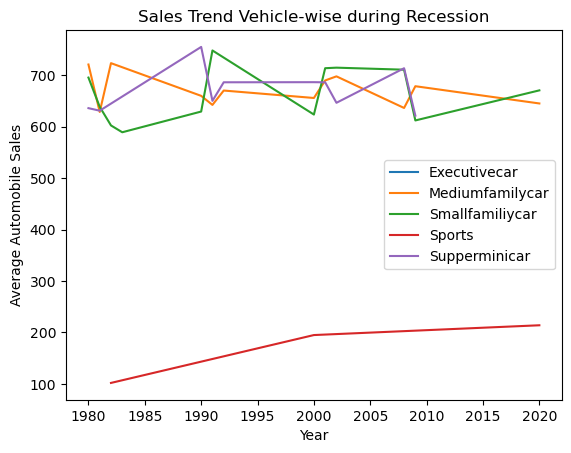

In [11]:
df_recession = df[df['Recession']==1]
data_recession = df_recession.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
data_recession.set_index('Year', inplace=True)
data_recession = data_recession.groupby(['Vehicle_Type'])['Automobile_Sales']
data_recession.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

<h2>Comparing Sales during Recession vs. Non-Recession Periods</h2>
<p>This bar plot offers a clear comparison between average automobile sales during recession and non-recession periods:
<ul>
<li>We group the data by the Recession column and calculate the average sales for both recession (1) and non-recession (0) periods.</li>
<li>The visualization highlights the stark contrast in sales figures between these two economic phases, providing a clear picture of how recessions negatively affect the automobile market.</li>
</ul>
This comparison sets the stage for deeper investigation into what factors might be driving these differences.</p><br>

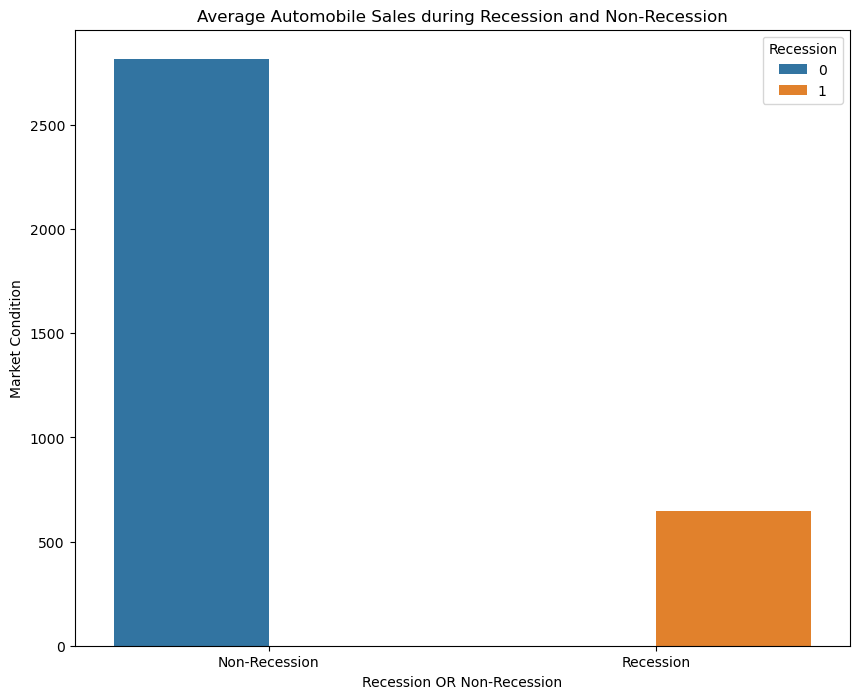

In [12]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession OR Non-Recession')
plt.ylabel('Market Condition')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

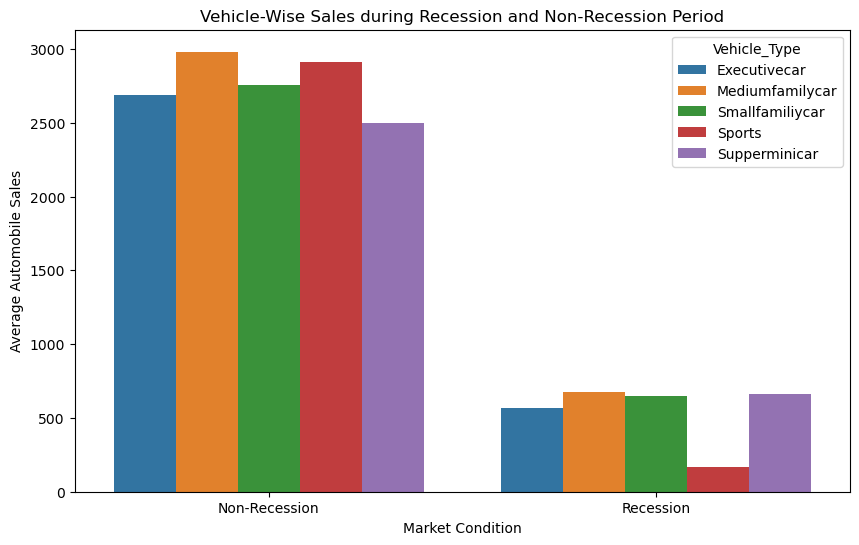

In [13]:
recession_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Market Condition')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

<h2>Analyzing GDP Trends during Recession and Non-Recession</h2>
<p>In this section, we analyze how GDP trends differ between recession and non-recession periods:
<ul>
    <li>Two side-by-side line plots compare GDP trends during both periods.</li>
    <li>These plots provide insights into the broader economic context of the data. </li>
    </ul>Typically, GDP declines during recessions, which could be closely correlated with drops in automobile sales. Understanding these trends can help explain the consumer behavior shifts we observe in the sales data.</p><br>

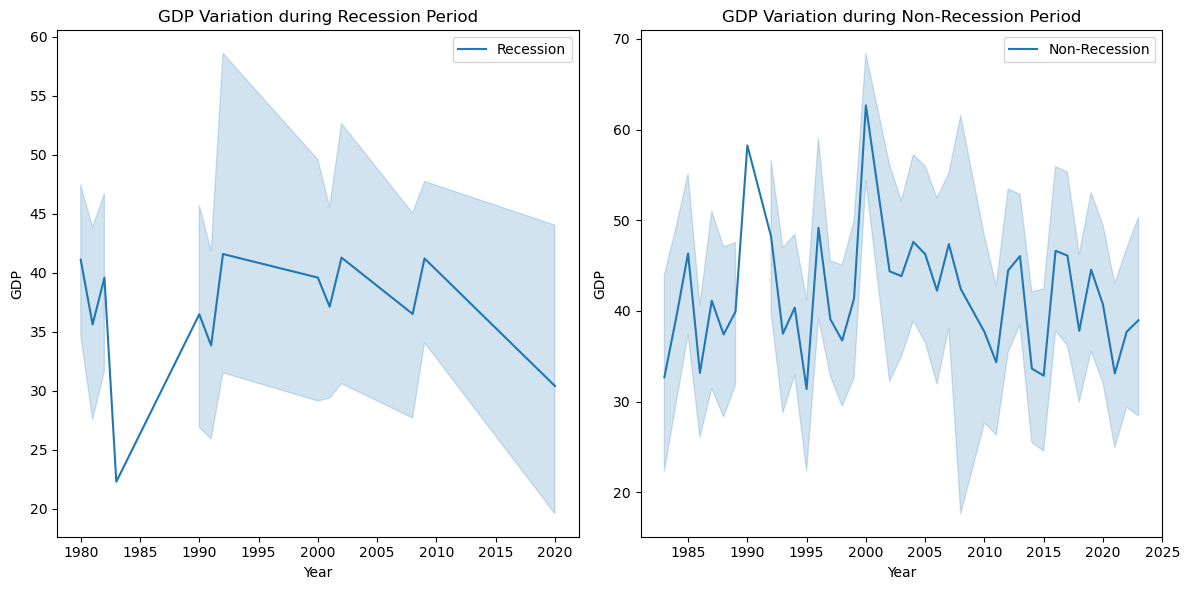

In [14]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1 ,2 ,2 ) 

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

<h2>Analyzing the Impact of Seasonality on Automobile Sales</h2>
<p>In this section, we explore how seasonality affects automobile sales during non-recession periods:
<br>
We filter the dataset to only include non-recession data (Recession == 0), focusing on understanding sales patterns when the economy is more stable.<br><br>
The scatter plot shows automobile sales throughout the months of the year. Each point represents a month's sales, and the size of the points corresponds to the Seasonality_Weight, indicating the influence of seasonality on sales.<br>
The color (hue) helps differentiate various Seasonality_Weights, visually highlighting how sales may peak during specific times of the year, such as holidays or new car release seasons.<br><br>
This visualization reveals how external seasonal factors (e.g., holidays, end-of-year bonuses, weather conditions) impact consumer behavior, providing valuable insights into demand cycles.</p>

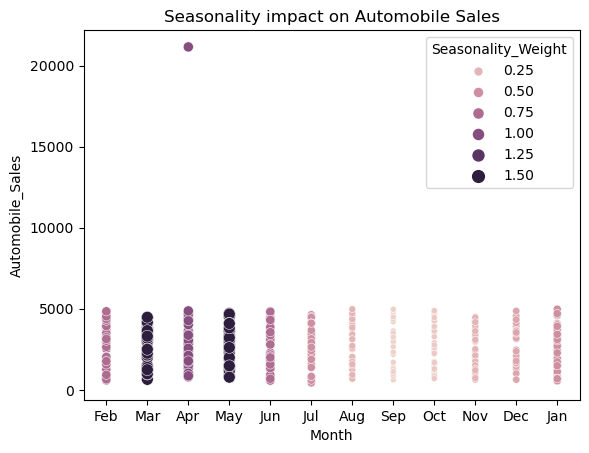

In [15]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

<h2>Investigating Consumer Confidence and Price</h2><br>
<b>Consumer Confidence:</b> Higher consumer confidence typically correlates with higher automobile sales, as consumers feel more financially secure and willing to make large purchases like cars.<br>

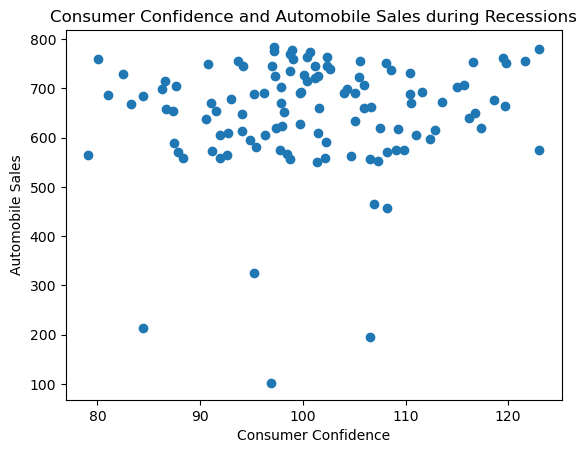

In [16]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

<b>Price:</b> The second plot examines the relationship between the average price of vehicles and sales during recessions. This can indicate whether lower prices stimulate sales or if demand for higher-priced vehicles decreases significantly in tough economic times.<br>

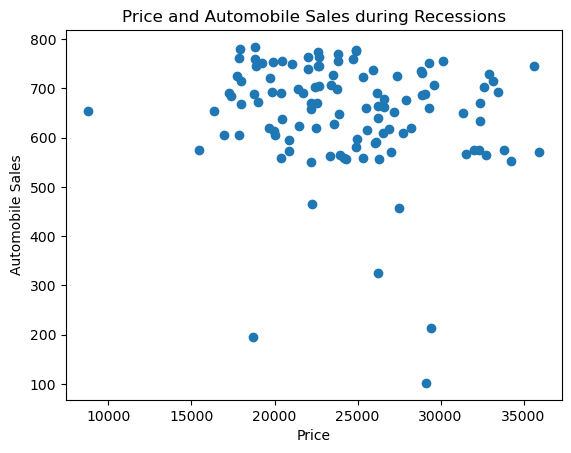

In [17]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Price and Automobile Sales during Recessions')
plt.show()

<h2>Analyzing Advertising Expenditure</h2>
<p>We compare the total advertising expenditure between recession and non-recession periods using a pie chart:
<br><br>
This analysis helps us understand how automobile companies adjust their advertising budgets in response to economic conditions. Do they spend more during recessions to boost demand, or do they cut back to save costs?</p><br>

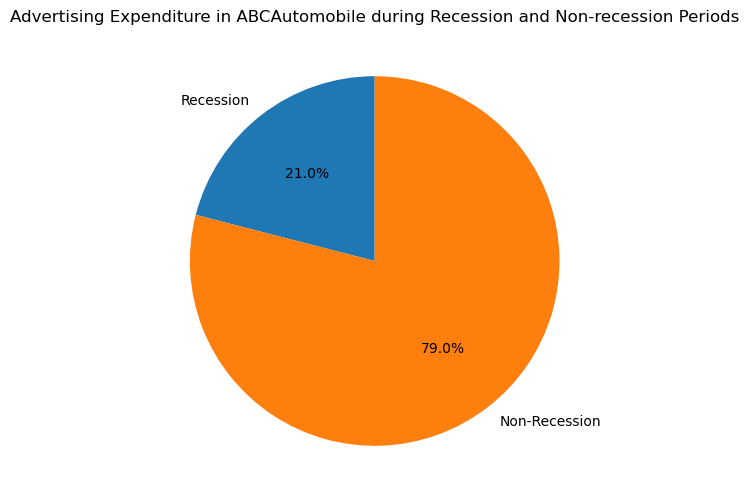

In [18]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure in ABCAutomobile during Recession and Non-recession Periods')
plt.show()

<h2>Advertising Expenditure by Vehicle Type during Recession</h2>
<p>This section dives deeper into the distribution of advertising expenditure by vehicle type during recession periods:
<br><br>
The pie chart shows how much each type of vehicle receives in advertising investment, providing insights into which segments are prioritized during tough economic times. Luxury vehicles might see lower spending, while affordable, practical vehicle types may receive more advertising focus.</p><br>

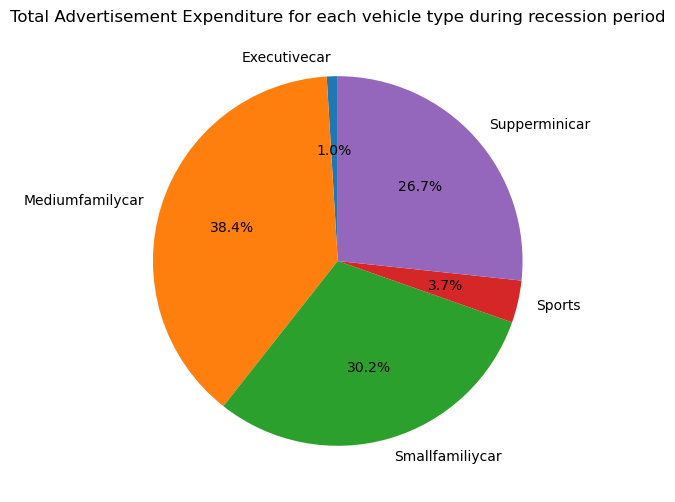

In [19]:
Rdata = df[df['Recession'] == 1]
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure for each vehicle type during recession period')
plt.show()

<h2>Analyzing the Effect of Unemployment Rate on Automobile Sales by Vehicle Type during Recession</h2>
<br>
<p>This section examines how the unemployment rate impacts automobile sales across different vehicle types during recession periods:</p>
    
<p>This plot reveals important insights into consumer behavior during recessions. For example, as the unemployment rate increases, we might observe a steeper decline in sales for more expensive vehicle types, while more economical vehicles might be less affected. These findings could help automobile manufacturers and retailers adjust their product offerings and marketing strategies during times of economic instability.</p><br>

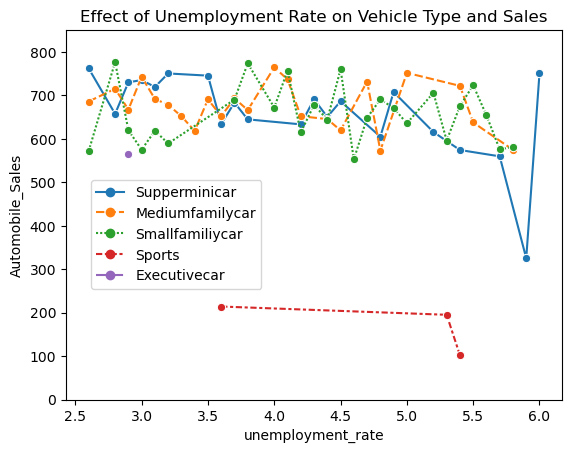

In [20]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.05,.3))